In [ ]:
!pip install tensorflow==2.7
!pip install jax==0.2.21

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.7/756.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jax: filename=jax-0.2.21-py3-none-any.whl size=869275 sha256=6232dbc0c6e24a0ce3a28c96b0891e0780e9aecd91c45e7f5b7e3cca03dd672b
  Stored in directory: /root/.cache/pip/wheels/8a/2d/e0/ab0e7b048d8ccb34e5d8afb32e823703b12748c7d66daf3067
Successfully built jax
  Attempting uninstall: jax
  

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2

In [ ]:
def prepare_images(input_root, output_root):
    target_size = (224, 224)

    for dataset_type in ["test", "val", "train"]:
        input_dir = os.path.join(input_root, dataset_type)
        output_dir = os.path.join(output_root, dataset_type)

        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        for class_name in ["NORMAL", "PNEUMONIA"]:
            class_input_dir = os.path.join(input_dir, class_name)
            class_output_dir = os.path.join(output_dir, class_name)

            if not os.path.exists(class_output_dir):
                os.makedirs(class_output_dir)

            for filename in os.listdir(class_input_dir):
                img_path = os.path.join(class_input_dir, filename)
                img = cv2.imread(img_path)

                resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
                gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                output_path = os.path.join(class_output_dir, filename)
                cv2.imwrite(output_path, gray_image)

In [ ]:
input_directory = "/content/drive/MyDrive/x-ray-data/chest_xray"
output_directory = "/content/drive/MyDrive/x-ray-data/chest_xray_refined"

In [ ]:
prepare_images(input_directory, output_directory)

## Distribution of Normal and Pneumonia Images:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset_dir = "/content/drive/MyDrive/x-ray-data/chest_xray/train"

normal_count = len(os.listdir(os.path.join(dataset_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(dataset_dir, 'PNEUMONIA')))

In [ ]:
labels = ['Без відхилень', 'Пневмонія']
sizes = [normal_count, pneumonia_count]
colors = ['green', 'blue']

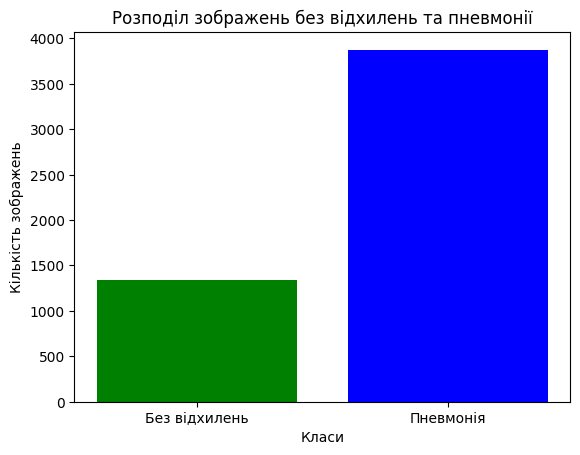

In [ ]:
plt.bar(labels, sizes, color=colors)
plt.xlabel('Класи')
plt.ylabel('Кількість зображень')
plt.title('Розподіл зображень без відхилень та пневмонії')
plt.show()

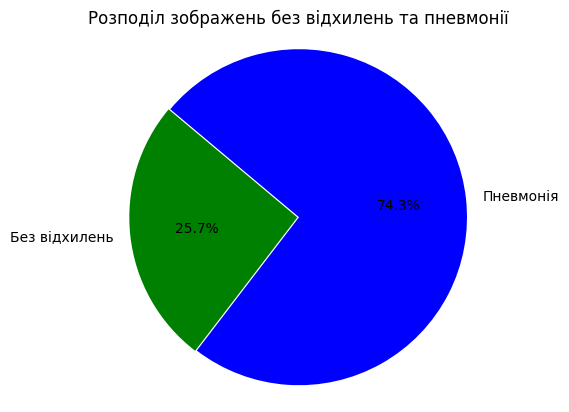

In [ ]:
explode = (0.01, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Розподіл зображень без відхилень та пневмонії')
plt.show()